In [ ]:
!pip install emnist

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt


**Load and Prepare Data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension (for grayscale images in MNIST)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)


**Build the CNN Model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


**Compile the Model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


**Train the Model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1495 - accuracy: 0.9536 - val_loss: 0.0428 - val_accuracy: 0.9865
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0458 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0274 - val_accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0317 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0382 - val_accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0330 -

**Evaluate the Model**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - loss: 0.0403 - accuracy: 0.9927 - 2s/epoch - 7ms/step
Test accuracy: 0.9926999807357788


**Make Predictions**

In [ ]:
predictions = model.predict(test_images)


313/313 [==============================] - 2s 8ms/step


**Visualize Results**

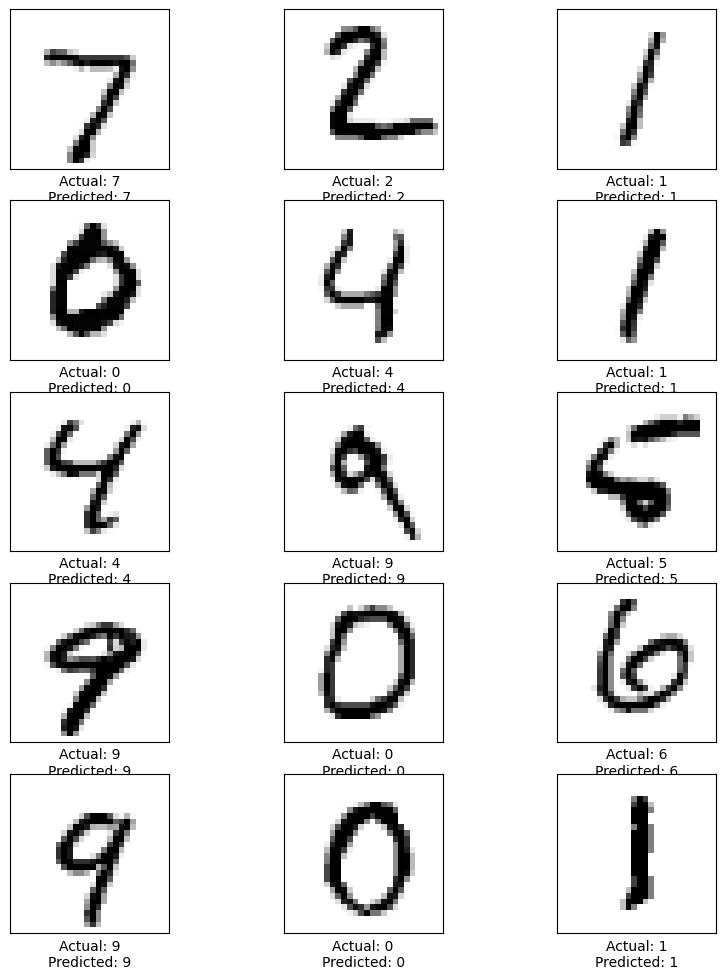

In [ ]:

n_rows = 5
n_cols = 3
plt.figure(figsize=(10, 12))
for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {test_labels[i]}\nPredicted: {tf.argmax(predictions[i])}')
plt.show()
